In [47]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']


# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import os, sys, email,re

Populating the interactive namespace from numpy and matplotlib


C:\Users\mai_a\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
model_data = pd.read_csv("C:/Users/mai_a/Desktop/Project4_NLP/cleaned_data_final.csv")

In [10]:
model_data.head()

,Unnamed: 0,Unnamed: 0.1,Rating,Review_Text,Review_Text1,Review_Text2,text_stemmed,text_lemmatized,text_corrected,Without3letters,Emoji_Count,WithoutEmojis
0,0,0,4,ve ever disneyland anywhere ll find disneyland...,ve ever anywhere ll find hong kong similar lay...,ve ever anywhere ll find hong kong similar lay...,ve ever anywher ll find hong kong similar layo...,ve ever anywher ll find hong kong similar layo...,ve ever anywher all find hong kong similar lay...,ever anywher find hong kong similar layout w...,0,
1,1,1,4,since d last time visit hk disneyland yet time...,since d last visit hk yet stay tomorrowland ak...,since d last visit hk yet stay tomorrowland ak...,sinc d last visit hk yet stay tomorrowland aka...,sinc d last visit hk yet stay tomorrowland aka...,since i last visit he yet stay tomorrowland ak...,since last visit stay tomorrowland marvel ...,0,...
2,2,2,4,thanks god wasn t hot humid visiting park othe...,thanks god wasn hot humid visiting otherwise b...,thanks god wasn hot humid visiting otherwise b...,thank god wasn hot humid visit otherwis big is...,thank god wasn hot humid visit otherwis big is...,thank god wasn hot humid visit otherwise big i...,thank wasn humid visit otherwise issue sha...,0,...
3,3,3,4,hk disneyland great compact park unfortunately...,hk great compact unfortunately quite bit maint...,hk great compact unfortunately quite bit maint...,hk great compact unfortun quit bit mainten wor...,hk great compact unfortun quit bit mainten wor...,he great compact unfortune quit bit maintain w...,great compact unfortune quit maintain work ...,0,
4,4,4,4,location city took around 1 hour kowlon kids l...,location city took around 1 hour kowlon kids l...,location city took around 1 hour kowlon kids l...,locat citi took around 1 hour kowlon kid like ...,locat citi take around 1 hour kowlon kid like ...,local city take around 1 hour kowloon kid like...,local city take around hour kowloon like muc...,0,


## K-Means

In [41]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
data = model_data['Without3letters']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 200)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [21]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,actual,adult,adventure,allow,alway,amaz,area,arriv,attract,avail,...,water,weather,week,weekend,wonder,work,world,worth,year,young
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.262615,0.275061,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.142351,0.000000,0.224200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.123862,0.000000,0.153725,0.220184,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.259107,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.27117,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0


In [30]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

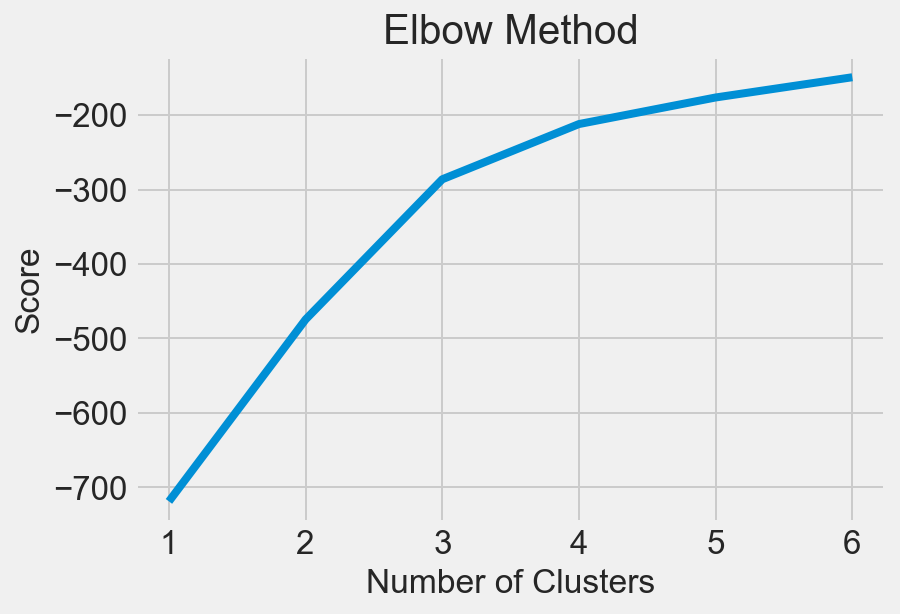

In [31]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


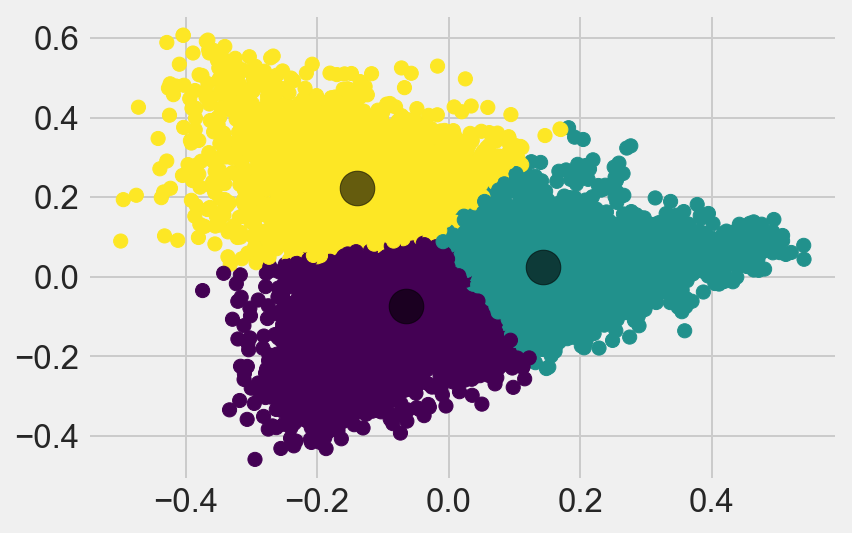

In [42]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [45]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 10)

In [46]:
dfs

[  features     score
 0    place  0.082994
 1    great  0.070681
 2     love  0.068858
 3    visit  0.062639
 4    enjoy  0.053870
 5   parade  0.043814
 6   family  0.042685
 7     year  0.041518
 8     good  0.039992
 9   experi  0.039667,
   features     score
 0     line  0.105278
 1     wait  0.094381
 2     ride  0.086454
 3     long  0.072480
 4     fast  0.064847
 5    crowd  0.061415
 6     hour  0.050914
 7     just  0.049036
 8    peopl  0.048984
 9    minut  0.045694,
   features     score
 0     hong  0.194791
 1     kong  0.194592
 2    small  0.118462
 3    visit  0.104819
 4  attract  0.063189
 5     good  0.056014
 6    world  0.051928
 7    enjoy  0.050512
 8  compare  0.044056
 9     park  0.042025]